PURPOSE:
    1.To correlate Per Capita Pharmaceutical Spending with Health Quality
    2.To correlate Per Capita Pharmaceutical Spending with Life Expectancy 

BACKGROUND:
    Pharmaceuticals are essential to health care. It is only meaningful if pharmaceutical expenses are positively correlated with health quality, despite the fact that health quality is a complex interplay of various factors e.g. health system, public health policy, staffing, equipment, infrastructure, pharmaceuticals, access, wait time etc.  

    Health Quality Rank has been compiled in the annual Legatum Prosperity Index report published annually

    Life Expectancy is also a commonly established metric published by various organizations e.g. WHO, OECD, and is accessible through various links.

    In this project, I am trying to establish whether Pharmaceutical Spending in terms of Per Capita Spending (USD_CAP) ranking is positively correlated with 
        1. Health Quality ranking
        2. Life Expectancy ranking

    During earlier Exploratory Data Analysis, Per Capita Spending rank has been has been established.

    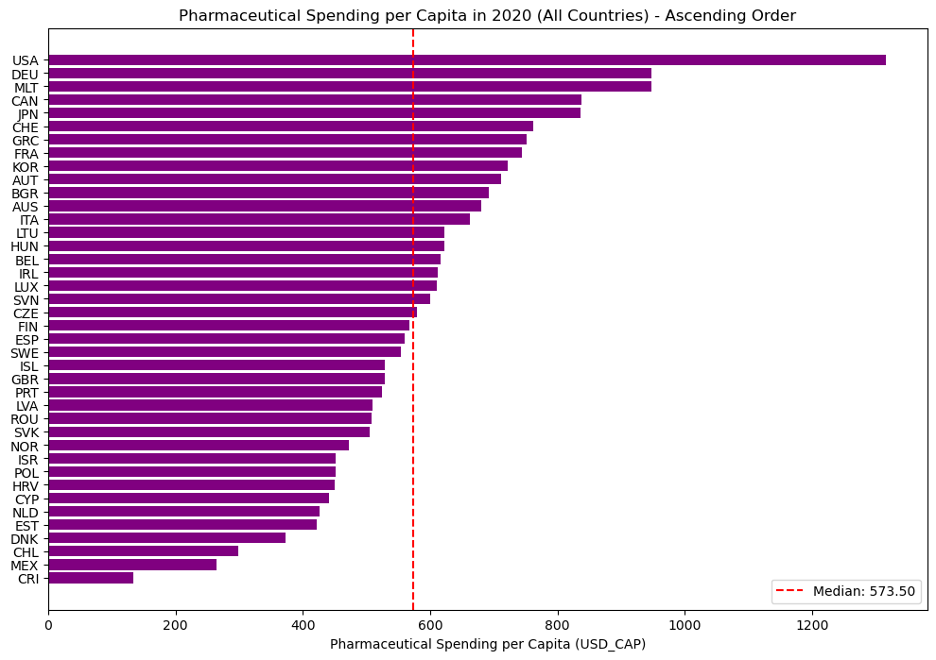


STEPS:
1. Establish a dataframe with the corresponding ranks

2. Calculate the Pearson Correlation Coefficient

3. Fit the Linear Regression Model using Least Squares

4. Find the Slope & Intercept, and p-value

5. Plot the Regression Line


RESULTS:
    
    1. For the Correlation of Health Care rank with Per Capital Spending rank, there is a positive correlation of 0.43, p=0.008 indicating the correlation is significant at 99% confidence interval.

    However, r-squared = 0.18, indicating only 18% of the the Health Quality rank is explained by Per Capita Spending rank.

    This is not surprising as Health Quality is an interplay of many factors as discussed above.


    2. For the Correlation of Life Expectancy with Per Capita rank, there is a positive correlation of 0.56, p=0.0000, indicating the correlation is significant at the 99% confidence interval.

    r-squared = 0.31, indicating only 31% of the Life Expectancy rank is explained by the Per Capita Spending rank.

    Again, other factors come into play in influency Life Expectancy.


    3. Per Capita Spending has a bigger impact on Life Expectancy rank than Health Quality.






/var/folders/16/_jng7rbj3qg6snfqznk76h180000gn/T/ipykernel_29351/3144568560.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
/var/folders/16/_jng7rbj3qg6snfqznk76h180000gn/T/ipykernel_29351/3144568560.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]
/var/folders/16/_jng7rbj3qg6snfqznk76h180000gn/T/ipykernel_29351/3144568560.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

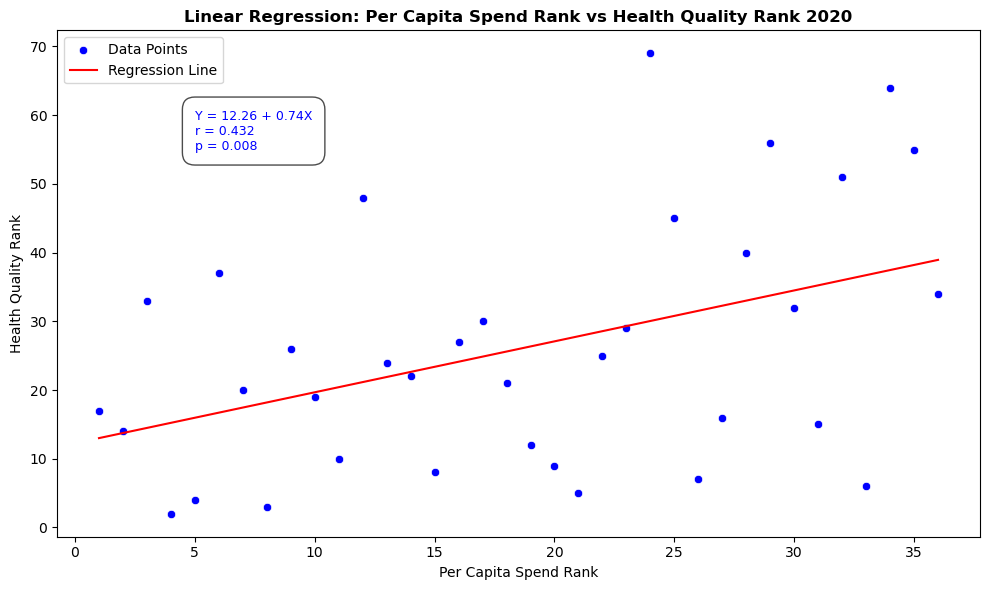

Correlation coefficient: 0.432
P-value: 0.008


In [3]:
### After exclusion of 4 outliers (USA, BGR, LTU, LVA), r improves from 0.21 to 0.43

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

# 2020 Per Capita Spend Rank
per_capita_spend_rank = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36] 

# 2020 Health Quality Rank based on Legatum Prosperity Index
health_quality_rank = [17, 14, 33, 2, 4, 37, 20, 3, 26, 19, 10, 48, 24, 22, 8, 27, 30, 21, 12, 9, 5, 25, 29, 69, 45, 7, 16, 40, 56, 32, 15, 51, 6, 64, 55, 34] 

# Create a DataFrame
df = pd.DataFrame({
    'Per Capita Spend Rank': per_capita_spend_rank,
    'Health Quality Rank': health_quality_rank
})

# Calculate the Pearson correlation coefficient
correlation_coef, _ = pearsonr(df['Per Capita Spend Rank'], df['Health Quality Rank'])

# Fit the linear regression model using OLS
X = sm.add_constant(df['Per Capita Spend Rank'])  # Add a constant for intercept
y = df['Health Quality Rank']
model = sm.OLS(y, X).fit()

# Get the intercept (a) and slope (b) from the model
intercept = model.params[0]
slope = model.params[1]
equation = f'Y = {intercept:.2f} + {slope:.2f}X'

# Get the p-value from the model
p_value = model.pvalues[1]

# Get the predicted values for the regression line
df['Predicted Health Quality Rank'] = model.predict(X)

# Plotting the scatter plot and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Per Capita Spend Rank'], y=df['Health Quality Rank'], label='Data Points', color='blue')
plt.plot(df['Per Capita Spend Rank'], df['Predicted Health Quality Rank'], color='red', label='Regression Line')

# Add the equation, correlation coefficient, and p-value inside a single box with a smaller font
text_box = f'Y = {intercept:.2f} + {slope:.2f}X\nr = {correlation_coef:.3f}\np = {p_value:.3f}'
plt.text(5, 55, text_box, fontsize=9, color='blue', bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=1'))

# Adding labels and title
plt.title('Linear Regression: Per Capita Spend Rank vs Health Quality Rank 2020', fontweight='bold')
plt.xlabel('Per Capita Spend Rank')
plt.ylabel('Health Quality Rank')

# Customize the legend and keep it inside the plot
plt.legend(loc='upper left', fontsize=10)

# Show the plot
plt.tight_layout()  # Automatically adjust the plot to fit everything
plt.show()

# Output the correlation coefficient and p-value
print(f'Correlation coefficient: {correlation_coef:.3f}')
print(f'P-value: {p_value:.3f}')

/var/folders/16/_jng7rbj3qg6snfqznk76h180000gn/T/ipykernel_29351/273073511.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
/var/folders/16/_jng7rbj3qg6snfqznk76h180000gn/T/ipykernel_29351/273073511.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]
/var/folders/16/_jng7rbj3qg6snfqznk76h180000gn/T/ipykernel_29351/273073511.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

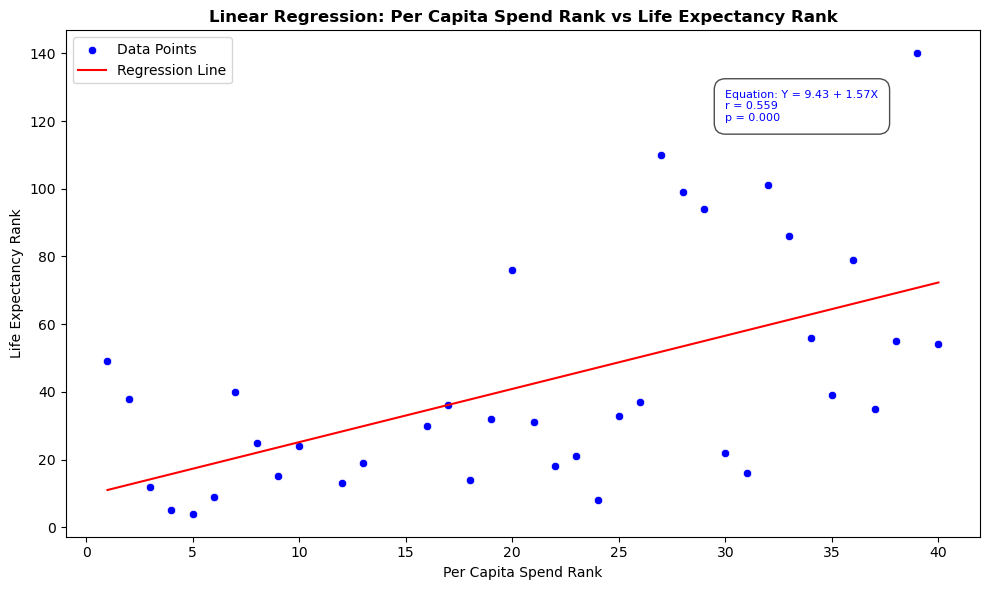

Correlation coefficient: 0.559
P-value: 0.000


In [4]:
### 3 Outliers removed - Bulgaria (11, 118), Lithuania (14, 117), Hungary (15, 119), r improves from 0.37 to 0.56


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

## 2020 Per Capita Spend Rank
per_capita_spend_rank = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                         25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]                    

## Life Expectancy Rank based on data from CIA.gov
life_expectancy_rank = [49, 38, 12, 5, 4, 9, 40, 25, 15, 24, 13, 19, 30, 36, 14, 32, 76,
                        31, 18, 21, 8, 33, 37, 110, 99, 94, 22, 16, 101, 86, 56, 39, 79, 35, 55, 140, 54]   



# Create a DataFrame
df = pd.DataFrame({
    'Per Capita Spend Rank': per_capita_spend_rank,
    'Life Expectancy Rank': life_expectancy_rank
})

# Calculate the Pearson correlation coefficient
correlation_coef, _ = pearsonr(df['Per Capita Spend Rank'], df['Life Expectancy Rank'])

# Fit the linear regression model using OLS
X = sm.add_constant(df['Per Capita Spend Rank'])  # Add a constant for intercept
y = df['Life Expectancy Rank']
model = sm.OLS(y, X).fit()

# Get the intercept (a) and slope (b) from the model
intercept = model.params[0]
slope = model.params[1]
equation = f'Y = {intercept:.2f} + {slope:.2f}X'

# Get the p-value from the model
p_value = model.pvalues[1]

# Get the predicted values for the regression line
df['Predicted Life Expectancy Rank'] = model.predict(X)

# Plotting the scatter plot and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Per Capita Spend Rank'], y=df['Life Expectancy Rank'], label='Data Points', color='blue')
plt.plot(df['Per Capita Spend Rank'], df['Predicted Life Expectancy Rank'], color='red', label='Regression Line')

# Display the equation, correlation coefficient, and p-value in the upper-right corner
plt.text(30, 120, f'Equation: Y = {intercept:.2f} + {slope:.2f}X\nr = {correlation_coef:.3f}\np = {p_value:.3f}',
         fontsize=8, color='blue', bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=1'))

# Adding labels and title
plt.title('Linear Regression: Per Capita Spend Rank vs Life Expectancy Rank', fontweight='bold')
plt.xlabel('Per Capita Spend Rank')
plt.ylabel('Life Expectancy Rank')

# Move the legend to the upper-left corner
plt.legend(loc='upper left', fontsize=10)

# Show the plot
plt.tight_layout()  # Automatically adjust the plot to fit everything
plt.show()

# Output the correlation coefficient and p-value
print(f'Correlation coefficient: {correlation_coef:.3f}')
print(f'P-value: {p_value:.3f}')

RESULTS:

